In [ ]:
# Install/upgrade wikipedia and statsmodels packages for the lab
!pip install wikipedia
!pip install statsmodels --upgrade

# **Part1**

# **Q1**

[2 marks] The list of the various MSc programmes offered by the School of EECS is provided at the following URL: http://eecs.qmul.ac.uk/postgraduate/programmes/. Scrape this website to create a DataFrame where each row corresponds to a programme, and contains the following columns:
"Programme": the name of the programme;
"URL": the link to the URL that contains information about this programme;
"Modules": a list of the titles of all modules in the programme (compulsory or elective).

In [ ]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
import time

In [ ]:
def scraper(url):
  html = urlopen(url)
  #print(html.status)
  soup = BeautifulSoup(html, 'lxml')
  #print(type(soup))
  return soup

In [ ]:
url = "http://eecs.qmul.ac.uk/postgraduate/programmes/"
soup = scraper(url)

200
<class 'bs4.BeautifulSoup'>


In [ ]:
course_list = []
for x in soup.find_all("div", class_= 'reveal-more__content'):
  li_list = x.div.ul.find_all('li')
  course_list.extend(li_list)
print(len(course_list))





14


In [ ]:
df = pd.DataFrame(columns=['Programme', 'URL', 'Modules'])
for course in course_list:
  modules = []
  title = course.get_text()
  href = course.a.get('href')
  course_soup = scraper(href)
  #time.sleep(5)
  module_objects = course_soup.find_all("div", class_= 'disclosure-box__section')
  for item in module_objects:
    modules.append(item.button.h4.get_text())
  df = df.append({'Programme': title, 'URL': href, 'Modules': modules}, ignore_index=True)

In [ ]:
print(df.shape)
df.head()

(14, 3)


,Programme,URL,Modules
0,MSc Artificial Intelligence,https://www.qmul.ac.uk/postgraduate/taught/cou...,"[Ethics, Regulation and Law in Advanced Digita..."
1,MSc Big Data Science,https://www.qmul.ac.uk/postgraduate/taught/cou...,"[Principles of Machine Learning, Neural Networ..."
2,MSc Computer Games,https://www.qmul.ac.uk/postgraduate/taught/cou...,"[Artificial Intelligence in Games, Multi-platf..."
3,MSc Computer Science,https://www.qmul.ac.uk/postgraduate/taught/cou...,"[Functional Programming, Security and Authenti..."
4,MSc Computer Science by Research,https://www.qmul.ac.uk/postgraduate/taught/cou...,"[MSc by Research Project, Digital Media and So..."


# **Q3**

[2 marks] Write an implementation of the PageRank algorithm. You must define a function that takes two parameters:
A: numpy array containing the adjacency matrix of the input graph. You may assume there are no dangling nodes;
alpha: the teleportation probability. Use your implementation to derive the PageRank vector for the graph from the previous exercise, setting  𝛼=0.1 .
The output should be the PageRank vector, in numpy array format.

In [ ]:
import numpy as np
from scipy.sparse import csc_matrix

def customPageRank(G, alpha = .1, maxerr = .0001):

    n = G.shape[0]

    A = csc_matrix(G,dtype=np.float)
    rsums = np.array(A.sum(1))[:,0]
    ri, ci = A.nonzero()
    A.data /= rsums[ri]

    sink = rsums==0

    ro, r = np.zeros(n), np.ones(n)
    while np.sum(np.abs(r-ro)) > maxerr:
        ro = r.copy()

        for i in range(0,n):

            Ai = np.array(A[:,i].todense())[:,0]

            Di = sink / float(n)

            Ei = np.ones(n) / float(n)

            r[i] = ro.dot( Ai*alpha + Di*alpha + Ei*(1-alpha) )

    return r/float(sum(r))

In [ ]:
G = np.array([[0,1,0,1],
              [0,0,1,0],
              [0,0,0,1],
              [1,0,0,0]])

print(customPageRank(G))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


[0.23913629 0.23737433 0.2491757  0.27431368]


# **Part 2**

2)[0.5 marks] Consider the following timeseries 𝑦={0.1,0.15,0.2,0.2,0.3,0.4,0.25,0.6,0.5}. Perform timeseries binning using 𝑘=3 values per bin, and show the resulting timeseries after binning.

In [ ]:
!pip install pyinform

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 131 kB 7.6 MB/s 


In [ ]:
from pyinform import utils
import numpy as np
time_np = np.array([0.1,0.15,0.2,0.2,0.3,0.4,0.25,0.6,0.5])
utils.bin_series(time_np, b=3)

(array([0, 0, 0, 0, 1, 1, 0, 2, 2], dtype=int32), 3, 0.16666666666666666)

# **Q3**

[1 mark] Load CSV file "timeseries.csv", which contains a univariate timeseries. Once loaded, convert the timeseries into a numpy array and use the numpy flatten() function to ensure that the loaded timeseries is one-dimensional. Compute the Discrete Fourier Transform (DFT) of the timeseries, and display plots for both the original timeseries and the magnitude of its DFT. How many predominant frequency components does the timeseries have?

In [ ]:
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np

series = read_csv('timeseries.csv')
series_numpy = np.array(series)
series_flatten = series_numpy.flatten()
series_flatten.shape

(1279,)

Text(0.5, 0, 'Time (index $n$)')

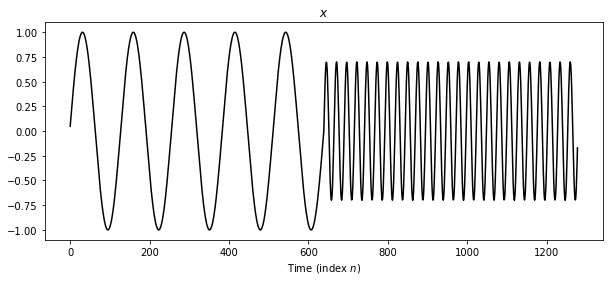

In [ ]:
# Plot
plt.figure(figsize=(10, 4))
plt.title('$x$')
plt.plot(series_flatten, 'k')
plt.xlabel('Time (index $n$)')

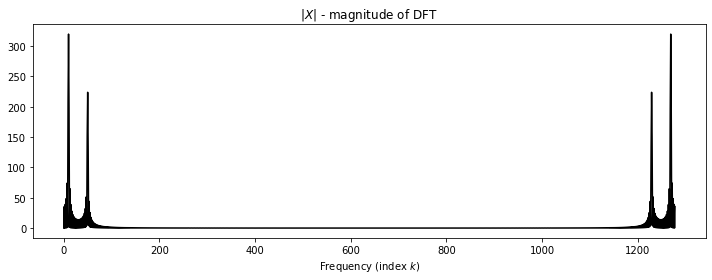

In [ ]:
# numpy implementation of FFT
Xfft = np.fft.fft(series_flatten)

# Plot
plt.figure(figsize=(10, 4))
plt.title('$|X|$ - magnitude of DFT')
plt.plot(np.abs(Xfft), 'k')
plt.xlabel('Frequency (index $k$)')
plt.tight_layout()

# **Q4**

[0.75 marks] Using the daily births dataset from this lab tutorial, smooth the timeseries using trailing moving average smoothing and a window size that corresponds to one week; then replace any NaN values with zeros. Perform timeseries forecasting using the smoothed dataset in order to predict daily births for the first 5 days of 1960, using the models below. Show your forecasting results.

AR model with  𝑝=2 
ARMA model with  𝑝=2  and  𝑞=2

In [ ]:
from pandas import read_csv
import matplotlib.pyplot as plt

series = read_csv('births.csv', header=0, index_col=0)

In [ ]:
# Perform trailing moving average smoothing
rolling = series.rolling(window=7) # using a window of 3 samples: t, t-1, t-2
rolling_mean = rolling.mean()

In [ ]:
print(rolling_mean.isna().sum())

Births    6
dtype: int64


In [ ]:
import numpy as np
clean_rolling_mean = rolling_mean.replace(np.NaN,0)

In [ ]:
print(clean_rolling_mean.isna().sum())

Births    0
dtype: int64


AR model with 𝑝=2 

In [ ]:
# Initialise
from statsmodels.tsa.ar_model import AutoReg

data = clean_rolling_mean
# Fit Autoregressive model
model = AutoReg(data, lags=2,old_names=False) # "lags" indicates the model order
model_fit = model.fit()

# Make prediction
last_day = len(data)
yhat = model_fit.predict(last_day, last_day+4) # arguments denote which dataset indices to predict
print(yhat)

1960-01-01    45.380177
1960-01-02    44.960852
1960-01-03    44.590676
1960-01-04    44.271699
1960-01-05    43.997395
Freq: D, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


ARMA model with 𝑝=2 and 𝑞=2

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

data2 = clean_rolling_mean

# Fit ARMA model
model = ARIMA(data2, order=(2, 0, 2)) # p=2, q=2
model_fit = model.fit()

# Make prediction
last_day = len(data2)
yhat = model_fit.predict(last_day, last_day+4) # arguments denote which dataset indices to predict
print(yhat)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


1960-01-01    45.810250
1960-01-02    45.818771
1960-01-03    45.728098
1960-01-04    45.564024
1960-01-05    45.347314
Freq: D, Name: predicted_mean, dtype: float64


# **Q5**

[0.75 marks] Using a similar process used in section 1 of this lab notebook, perform document clustering using k-means on the following wikipedia articles: anomaly detection, cluster analysis, k-means clustering, data mining, data warehouse, association rule learning. As with section 1, use the elbow metric to find an appropriate number of clusters. Discuss and display the document clustering results.

In [ ]:
import pandas as pd
import wikipedia

articles=['anomaly detection', 'cluster analysis', 'k-means clustering', 'data mining', 'data warehouse', 'association rule learning']
wiki_lst=[]
title=[]

# Load wikipedia articles
for article in articles:
   print("loading content: ",article)
   wiki_lst.append(wikipedia.page(article,auto_suggest=False).content)
   title.append(article)

loading content:  anomaly detection
loading content:  cluster analysis
loading content:  k-means clustering
loading content:  data mining
loading content:  data warehouse
loading content:  association rule learning


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst) # Create tf-idf feature of the wikipedia dataset

print(X.shape) # Print dimensions of tf-idf feature

(6, 3533)


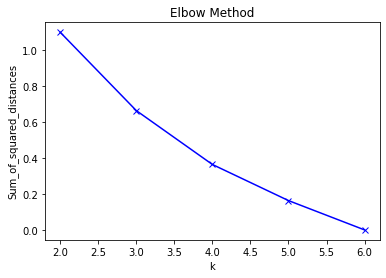

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(2,7)

for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

In [ ]:
# Fit k-means model with k=3
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)

# Print list of documents and associated clusters
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                       title  cluster
0          anomaly detection        0
1           cluster analysis        1
2         k-means clustering        1
5  association rule learning        1
3                data mining        2
4             data warehouse        2
